## ***Import Dependency***

<a id="1"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px"> 1. Data collection</h2>

#### Source : [https://www.kaggle.com/code/nitinkumarsingh123/ipl-score-prediction](https://www.kaggle.com/code/nitinkumarsingh123/ipl-score-prediction)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
delivery = pd.read_csv('../data/deliveries.csv')

In [3]:
match = pd.read_csv('../data/matches.csv')

In [4]:
delivery

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [5]:
delivery.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [6]:
delivery.info

<bound method DataFrame.info of         match_id  inning         batting_team                 bowling_team  \
0              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
1              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
2              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
3              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
4              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
...          ...     ...                  ...                          ...   
179073     11415       2  Chennai Super Kings               Mumbai Indians   
179074     11415       2  Chennai Super Kings               Mumbai Indians   
179075     11415       2  Chennai Super Kings               Mumbai Indians   
179076     11415       2  Chennai Super Kings               Mumbai Indians   
179077     11415       2  Chennai Super Kings               Mumbai Indians   

        over  ball    batsman n

In [7]:
delivery.shape

(179078, 21)

In [8]:
match

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [9]:
match.head(2)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [10]:
match.shape

(756, 18)

In [11]:
delivery.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [12]:
match.info

<bound method DataFrame.info of         id    Season           city        date                        team1  \
0        1  IPL-2017      Hyderabad  05-04-2017          Sunrisers Hyderabad   
1        2  IPL-2017           Pune  06-04-2017               Mumbai Indians   
2        3  IPL-2017         Rajkot  07-04-2017                Gujarat Lions   
3        4  IPL-2017         Indore  08-04-2017       Rising Pune Supergiant   
4        5  IPL-2017      Bangalore  08-04-2017  Royal Challengers Bangalore   
..     ...       ...            ...         ...                          ...   
751  11347  IPL-2019         Mumbai  05-05-2019        Kolkata Knight Riders   
752  11412  IPL-2019        Chennai  07-05-2019          Chennai Super Kings   
753  11413  IPL-2019  Visakhapatnam  08-05-2019          Sunrisers Hyderabad   
754  11414  IPL-2019  Visakhapatnam  10-05-2019               Delhi Capitals   
755  11415  IPL-2019      Hyderabad  12-05-2019               Mumbai Indians   

       

In [13]:
match.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [14]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

<a id="2"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px"> 2. Exploratory Data Analysis (EDA)</h2>

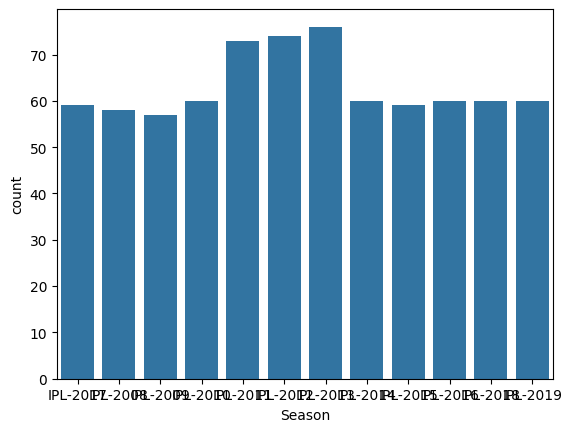

In [15]:
# Number of match each season
sns.countplot(x = 'Season', data = match)
plt.show()

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0.0, '0'),
  Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12')])

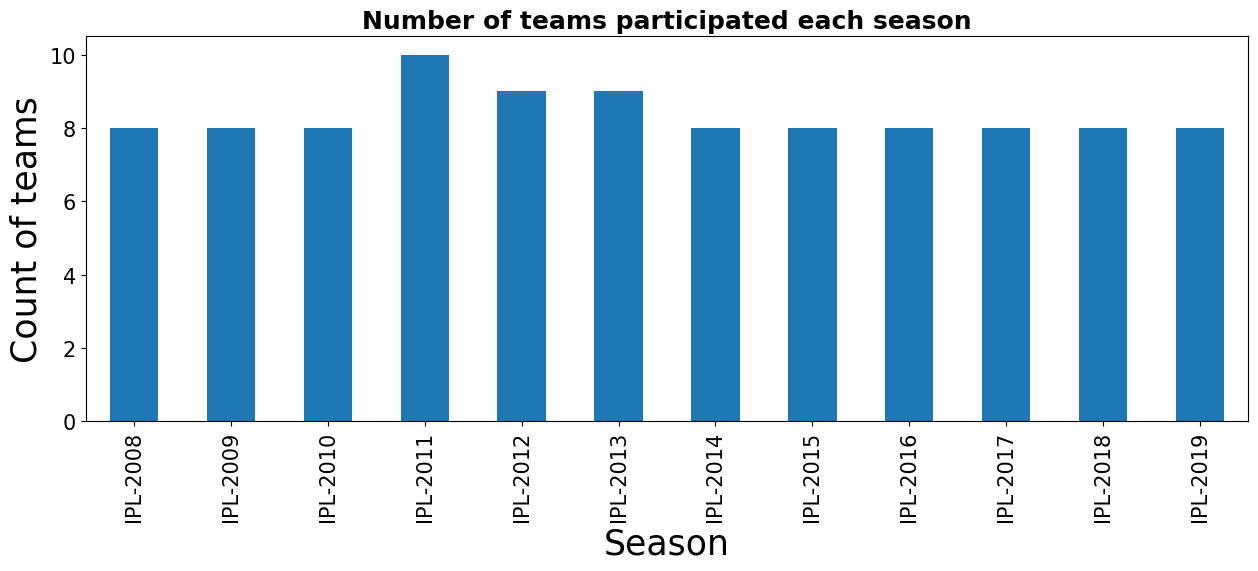

In [16]:
# Number of teams participated each season
match.groupby('Season')['team1'].nunique().plot(kind = 'bar', figsize=(15,5))
plt.title("Number of teams participated each season",fontsize=18,fontweight="bold")
plt.ylabel("Count of teams", size = 25)
plt.xlabel("Season", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

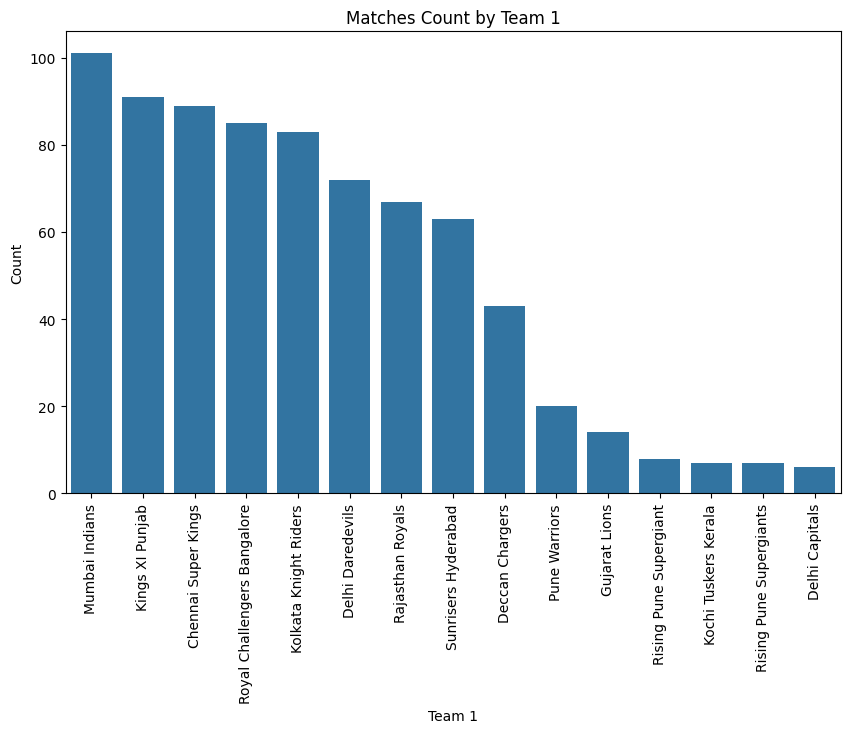

In [17]:
# Matches Count by Team 1
team1_counts = match['team1'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(x='team1', data=match, order=team1_counts.index)
plt.xlabel('Team 1')
plt.ylabel('Count')
plt.title('Matches Count by Team 1')
plt.xticks(rotation=90)
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Royal Challengers Bangalore'),
  Text(1, 0, 'Rising Pune Supergiant'),
  Text(2, 0, 'Kolkata Knight Riders'),
  Text(3, 0, 'Kings XI Punjab'),
  Text(4, 0, 'Sunrisers Hyderabad'),
  Text(5, 0, 'Mumbai Indians'),
  Text(6, 0, 'Gujarat Lions'),
  Text(7, 0, 'Delhi Daredevils'),
  Text(8, 0, 'Chennai Super Kings'),
  Text(9, 0, 'Rajasthan Royals'),
  Text(10, 0, 'Deccan Chargers'),
  Text(11, 0, 'Kochi Tuskers Kerala'),
  Text(12, 0, 'Pune Warriors'),
  Text(13, 0, 'Rising Pune Supergiants'),
  Text(14, 0, 'Delhi Capitals')])

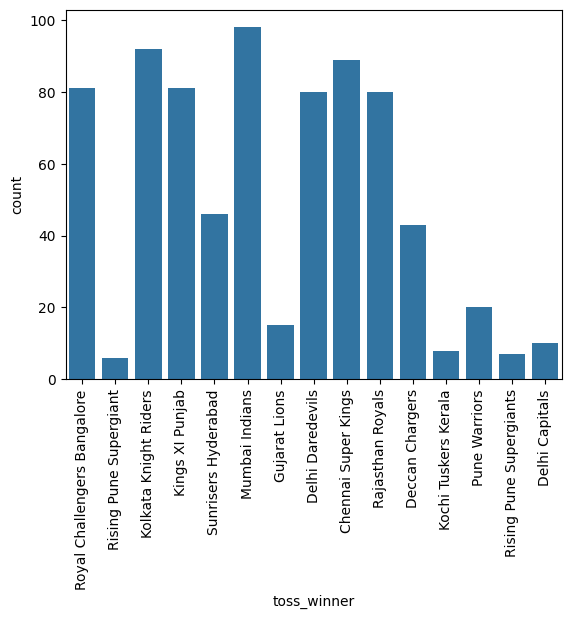

In [18]:
# toss_winner
sns.countplot( x = 'toss_winner', data = match)
plt.xticks(rotation='vertical')

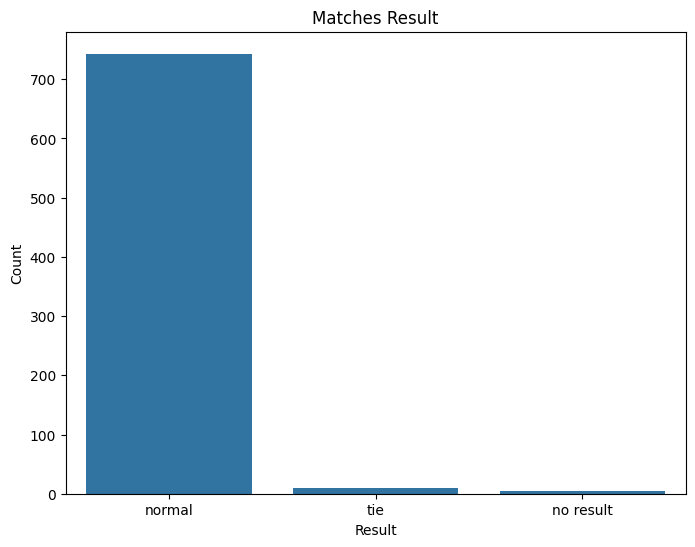

In [19]:
# Matches Result
result_counts = match['result'].value_counts()
plt.figure(figsize=(8, 6))
sns.countplot(x='result', data=match, order=result_counts.index)
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Matches Result')
plt.show()

C:\Users\emon1\AppData\Local\Temp\ipykernel_3300\1051356139.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=match, x='toss_match_winner', palette='Set2')


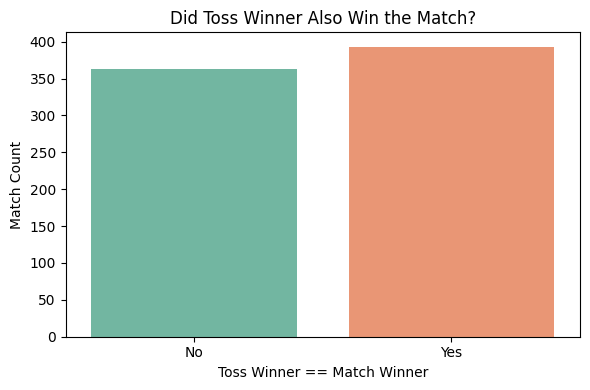

In [20]:
# Create a new column indicating whether toss winner also won the match
match['toss_match_winner'] = match['toss_winner'] == match['winner']

# Countplot
plt.figure(figsize=(6, 4))
sns.countplot(data=match, x='toss_match_winner', palette='Set2')

# Improve labeling
plt.title('Did Toss Winner Also Win the Match?')
plt.xlabel('Toss Winner == Match Winner')
plt.ylabel('Match Count')
plt.xticks(ticks=[0,1], labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

In [21]:
match.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'toss_match_winner'],
      dtype='object')

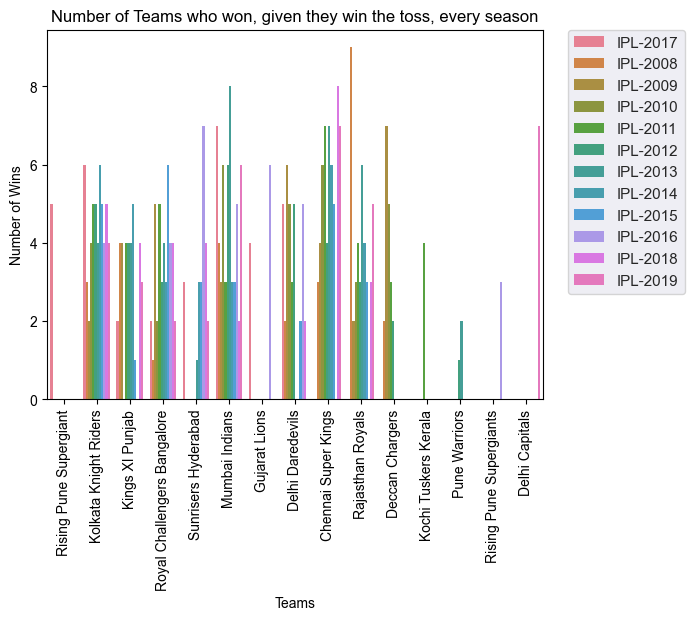

In [22]:
# Number of Teams who won, given they win the toss, every season
winneroftoss = match[(match['toss_winner']) == (match['winner'])]

wot = sns.countplot( x = 'winner', hue='Season', data=winneroftoss)
sns.set(rc={'figure.figsize':(8,6)})
plt.xticks(rotation = 'vertical')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Teams")
plt.ylabel("Number of Wins")
plt.title("Number of Teams who won, given they win the toss, every season")
plt.show(wot)

C:\Users\emon1\AppData\Local\Temp\ipykernel_3300\3946171615.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_players.index, y = top_players, orient='v', palette="RdBu");


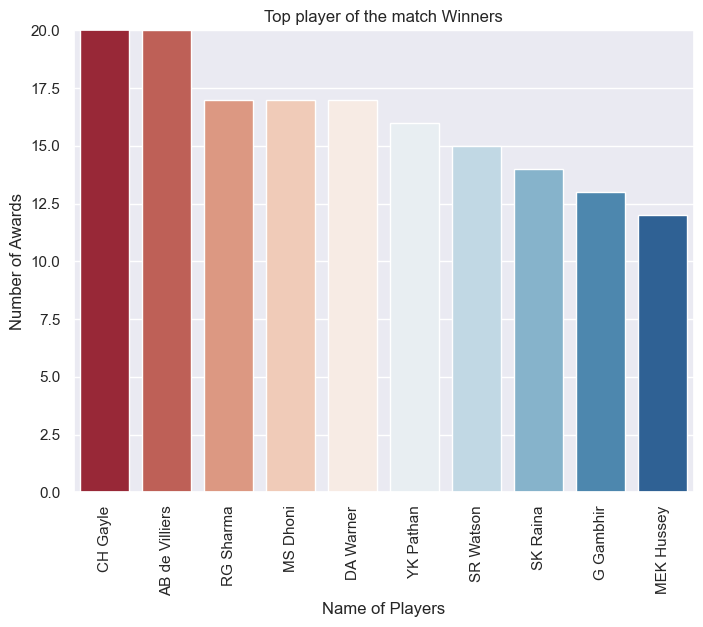

In [23]:
# top player of the 
top_players = match.player_of_match.value_counts()[:10]

fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Number of Awards")
ax.set_xlabel("Name of Players")
ax.set_title("Top player of the match Winners")
sns.barplot(x = top_players.index, y = top_players, orient='v', palette="RdBu");
plt.xticks(rotation = 'vertical')
plt.show()

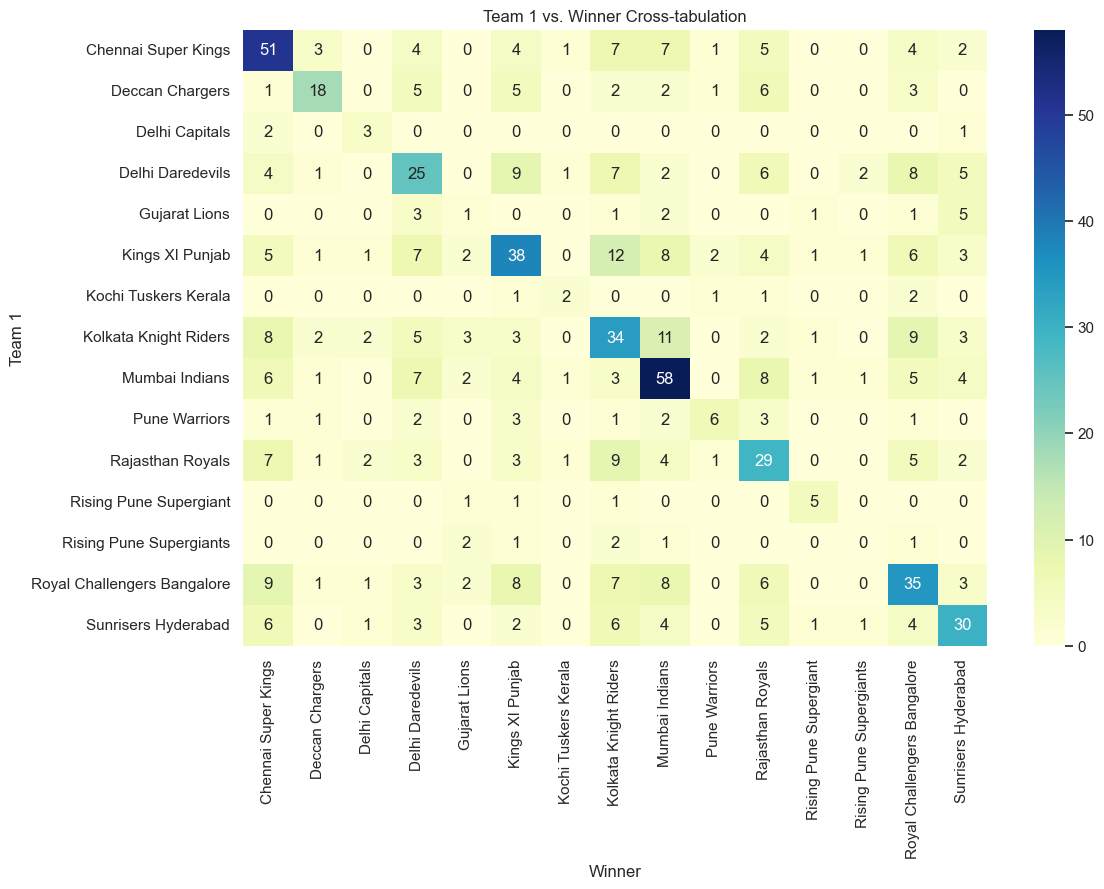

In [24]:
# Cross-tabulation
cross_tab = pd.crosstab(match['team1'], match['winner'])

# Plotting Heatmap for Cross-tabulation
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Winner')
plt.ylabel('Team 1')
plt.title('Team 1 vs. Winner Cross-tabulation')
plt.show()

<Axes: >

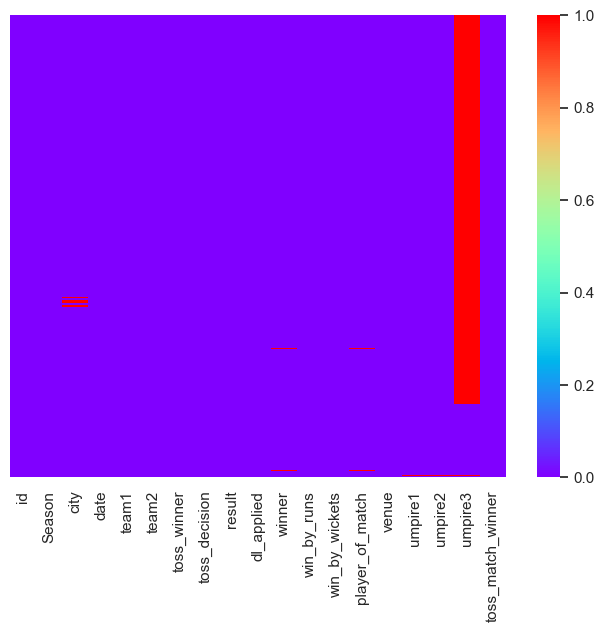

In [25]:
# checking for the null values in updated dataframe
sns.heatmap(match.isnull(),cmap='rainbow',yticklabels=False)

<a id="3"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px"> 3. Data Preprocessing</h2>

### ***Sum of innning Run***

In [26]:
# Calculating total runs scored in each inning of each match
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [27]:
total_score_df

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1523,11413,2,170
1524,11414,1,155
1525,11414,2,162
1526,11415,1,152


In [28]:
# Filtering to only include first innings scores (inning == 1)
total_score_df = total_score_df[total_score_df['inning']==1]

In [29]:
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


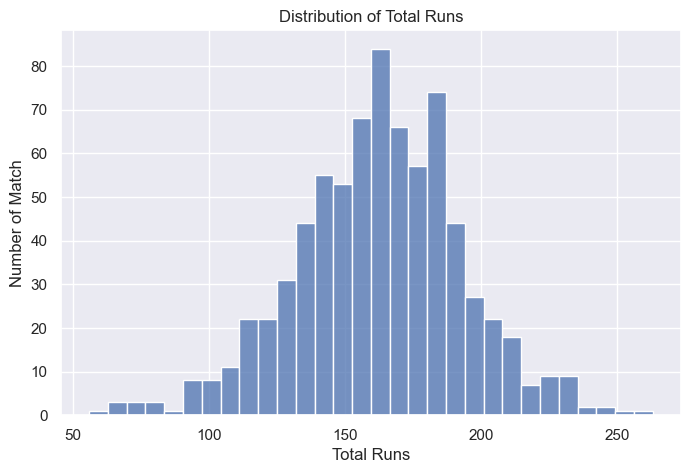

In [30]:
# Creating a histogram to visualize the distribution of total runs in first innings
plt.figure(figsize=(8, 5))
sns.histplot(total_score_df['total_runs'], bins=30, kde=False)
plt.title('Distribution of Total Runs')
plt.xlabel('Total Runs')
plt.ylabel('Number of Match')
plt.show()

In [31]:
# Merge total_runs from total_score_df into match DataFrame based on match ID
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on="match_id")

In [32]:
match_df.head(2)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,toss_match_winner,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,False,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,...,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,True,2,184


In [33]:
match_df['team1'].nunique()

15

In [34]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [35]:
# Defining a list of current IPL teams we want to focus on
teams =[
    'Sunrisers Hyderabad', 'Mumbai Indians','Royal Challengers Bangalore','Kolkata Knight Riders','Kings XI Punjab',
    'Chennai Super Kings', 'Rajasthan Royals', 'Delhi Capitals'
]

In [36]:
# Standardizing team names by replacing old names with current ones
match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['team1']=match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2']=match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

In [37]:
# Filtering to only include matches between our selected teams
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [38]:
# Checking for missing values in the dataframe
match_df.isnull().sum()

id                     0
Season                 0
city                   7
date                   0
team1                  0
team2                  0
toss_winner            0
toss_decision          0
result                 0
dl_applied             0
winner                 3
win_by_runs            0
win_by_wickets         0
player_of_match        3
venue                  0
umpire1                2
umpire2                2
umpire3              522
toss_match_winner      0
match_id               0
total_runs             0
dtype: int64

In [39]:
match_df.head(2)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,toss_match_winner,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,False,1,207
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,...,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,True,5,157


In [40]:
# Verifying number of unique teams in team1 after filtering
match_df['team1'].nunique()

8

In [41]:
# Verifying number of unique teams in team2 after filtering
match_df['team2'].nunique()

8

In [42]:
# Listing unique teams in team1 after filtering
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Mumbai Indians', 'Chennai Super Kings', 'Rajasthan Royals'],
      dtype=object)

In [43]:
# Listing unique teams in team2 after filtering
match_df['team2'].unique()

array(['Royal Challengers Bangalore', 'Delhi Capitals', 'Mumbai Indians',
       'Kings XI Punjab', 'Kolkata Knight Riders', 'Sunrisers Hyderabad',
       'Rajasthan Royals', 'Chennai Super Kings'], dtype=object)

In [44]:
# Showing first 3 rows of the dataframe
match_df.head(3)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,toss_match_winner,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,False,1,207
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,...,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,True,5,157
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,...,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,True,7,178


In [45]:
# Filtering out matches where Duckworth-Lewis method was applied
match_df = match_df[match_df['dl_applied'] == 0]

In [46]:
match_df.head(3)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,toss_match_winner,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,False,1,207
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,...,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,True,5,157
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,...,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,True,7,178


In [47]:
# Selecting only relevant columns for our analysis
match_df = match_df[['match_id','city', 'winner', 'total_runs']]

In [48]:
match_df.head(2)

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,207
4,5,Bangalore,Royal Challengers Bangalore,157


In [49]:
# Merging the match information with delivery data
delivery_df = match_df.merge(delivery, on='match_id')

In [50]:
delivery_df.head(3)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [51]:
# Filtering to only include second innings data (where the chase happens)
delivery_df = delivery_df[delivery_df['inning']==2]

In [52]:
delivery_df.head(2)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [53]:
# Calculating cumulative runs scored over the course of each match
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [54]:
delivery_df.head(2)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1


In [55]:
# Calculating runs remaining to win the match
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score'] + 1

In [56]:
delivery_df.head(2)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,1,0,1,NaN,NaN,NaN,1,207
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,207


In [57]:
# Calculating balls remaining in the innings (120 balls = 20 overs)
delivery_df['balls_left'] = 126 - (delivery_df['over'] * 6 + delivery_df['ball'])

In [58]:
delivery_df.head(2)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,118


In [59]:
# Handling player dismissals - filling NA values with 0 (not out)
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna(0)

In [60]:
# Converting player_dismissed to binary (1 if out, 0 if not out)
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == 0 else 1)

In [61]:
delivery_df.head(2)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,0,NaN,NaN,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,1,207,118


In [62]:
# Calculating cumulative wickets fallen in each match
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values

In [63]:
# Calculating wickets remaining (10 - wickets fallen)
delivery_df['wickets'] = 10 - wickets

In [64]:
delivery_df.head(3)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,207,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,117,10


In [65]:
# Calculating current run rate (runs per over)
delivery_df['crr'] = delivery_df.current_score * 6 / (120 - delivery_df.balls_left)

In [66]:
delivery_df.head(2)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,NaN,NaN,1,207,119,10,6.0
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,NaN,NaN,1,207,118,10,3.0


In [67]:
# Calculating required run rate (runs needed per over to win)
delivery_df['rrr'] = delivery_df.runs_left * 6 / delivery_df.balls_left

In [68]:
delivery_df.head(3)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,207,119,10,6.0,10.436975
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,207,118,10,3.0,10.525424
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,1,207,117,10,2.0,10.615385


In [69]:
delivery_df = delivery_df.reset_index()

In [70]:
delivery_df.head(2)

,index,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
0,125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,...,1,0,NaN,NaN,1,207,119,10,6.0,10.436975
1,126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,...,0,0,NaN,NaN,1,207,118,10,3.0,10.525424


In [71]:
# Dropping the old index column
delivery_df.drop(columns='index',inplace=True)

In [72]:
delivery_df.head(2)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
0,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,207,119,10,6.0,10.436975
1,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,207,118,10,3.0,10.525424


In [73]:
# Function to determine if the batting team won the match
def is_win(df):
    winner = []
    for item,row in df.iterrows():
        if row.winner == row.batting_team:
            winner.append(1)
        else:
            winner.append(0)

    return winner

In [74]:
# Adding a binary 'winner' column (1 if batting team won, 0 otherwise)
delivery_df['winner'] = is_win(delivery_df)

In [75]:
delivery_df.columns

Index(['match_id', 'city', 'winner', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs_y',
       'player_dismissed', 'dismissal_kind', 'fielder', 'current_score',
       'runs_left', 'balls_left', 'wickets', 'crr', 'rrr'],
      dtype='object')

In [76]:
# Selecting only relevant columns for the final model
final_df = delivery_df[['match_id','batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','winner']]

In [77]:
final_df.head(2)

,match_id,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,winner
0,1,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,119,10,207,6.0,10.436975,0
1,1,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,118,10,207,3.0,10.525424,0


In [78]:
# Shuffling the dataframe to randomize the order of samples
final_df = final_df.sample(final_df.shape[0])

In [79]:
final_df.head(2)

,match_id,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,winner
4278,68,Rajasthan Royals,Deccan Chargers,Hyderabad,100,59,8,214,11.311475,10.169492,1
46277,496,Kings XI Punjab,Sunrisers Hyderabad,Hyderabad,39,32,6,205,11.386364,7.312500,1


In [80]:
# Standardizing team names in the final dataframe
final_df['batting_team']=final_df['batting_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
final_df['bowling_team']=final_df['bowling_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [81]:
final_df['batting_team']=final_df['batting_team'].str.replace('Delhi Daredevils','Delhi Capitals')
final_df['bowling_team']=final_df['bowling_team'].str.replace('Delhi Daredevils','Delhi Capitals')

In [82]:
# Checking unique cities in the data
final_df['city'].unique()

array(['Hyderabad', 'Jaipur', 'Centurion', 'Chandigarh', 'Indore',
       'Abu Dhabi', 'Bangalore', 'Ahmedabad', 'Kolkata', 'Mumbai',
       'Mohali', 'Durban', 'Visakhapatnam', 'Chennai', 'Johannesburg',
       'Dharamsala', nan, 'Cape Town', 'Nagpur', 'Pune', 'Delhi',
       'Raipur', 'Kimberley', 'Cuttack', 'Ranchi', 'East London',
       'Bengaluru', 'Sharjah', 'Port Elizabeth', 'Bloemfontein'],
      dtype=object)

In [83]:
final_df.batting_team.unique()

array(['Rajasthan Royals', 'Kings XI Punjab', 'Sunrisers Hyderabad',
       'Chennai Super Kings', 'Delhi Capitals',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Kolkata Knight Riders'], dtype=object)

In [84]:
final_df.bowling_team.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians',
       'Royal Challengers Bangalore', 'Kings XI Punjab',
       'Rajasthan Royals', 'Kolkata Knight Riders', 'Chennai Super Kings',
       'Delhi Capitals'], dtype=object)

In [85]:
final_df

,match_id,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,winner
4278,68,Rajasthan Royals,Sunrisers Hyderabad,Hyderabad,100,59,8,214,11.311475,10.169492,1
46277,496,Kings XI Punjab,Sunrisers Hyderabad,Hyderabad,39,32,6,205,11.386364,7.312500,1
21227,219,Rajasthan Royals,Mumbai Indians,Jaipur,137,79,6,174,5.560976,10.405063,0
15619,171,Sunrisers Hyderabad,Royal Challengers Bangalore,Centurion,72,45,8,170,7.920000,9.600000,0
39859,436,Rajasthan Royals,Kings XI Punjab,Chandigarh,75,62,8,145,7.344828,7.258065,1
...,...,...,...,...,...,...,...,...,...,...,...
44389,480,Rajasthan Royals,Delhi Capitals,Delhi,151,118,10,152,6.000000,7.677966,1
22114,227,Kolkata Knight Riders,Rajasthan Royals,Kolkata,111,103,9,132,7.764706,6.466019,1
31816,349,Delhi Capitals,Rajasthan Royals,Jaipur,41,56,8,141,9.468750,4.392857,1
37396,408,Delhi Capitals,Mumbai Indians,Delhi,7,20,9,161,9.300000,2.100000,1


In [86]:
# Handling missing city values by mapping teams to their home cities
import random
cities_dict = {
    'Royal Challengers Bangalore':'Bengaluru',
    'Chennai Super Kings':'Chennai',
    'Kings XI Punjab':'Mumbai',
    'Kolkata Knight Riders':'Kolkata',
    'Delhi Capitals':'Delhi',
    'Rajasthan Royals':'Jaipur',
    'Mumbai Indians':'Mumbai',
    'Sunrisers Hyderabad':'Hyderabad',
}
final_df['city']=final_df['city'].fillna(0)
def fill_city(x):
    if x.city == 0:
        team = [x.batting_team,x.bowling_team][random.randint(0,1)]
        return cities_dict[team]
    else :
        return x.city

final_df['city']=final_df.apply(fill_city,axis=1)

In [87]:
# Dropping any remaining NA values
final_df.dropna(inplace=True)

In [88]:
# Removing rows where balls_left is 0 (invalid cases)
final_df = final_df[final_df.balls_left !=0]

In [89]:
final_df

,match_id,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,winner
4278,68,Rajasthan Royals,Sunrisers Hyderabad,Hyderabad,100,59,8,214,11.311475,10.169492,1
46277,496,Kings XI Punjab,Sunrisers Hyderabad,Hyderabad,39,32,6,205,11.386364,7.312500,1
21227,219,Rajasthan Royals,Mumbai Indians,Jaipur,137,79,6,174,5.560976,10.405063,0
15619,171,Sunrisers Hyderabad,Royal Challengers Bangalore,Centurion,72,45,8,170,7.920000,9.600000,0
39859,436,Rajasthan Royals,Kings XI Punjab,Chandigarh,75,62,8,145,7.344828,7.258065,1
...,...,...,...,...,...,...,...,...,...,...,...
44389,480,Rajasthan Royals,Delhi Capitals,Delhi,151,118,10,152,6.000000,7.677966,1
22114,227,Kolkata Knight Riders,Rajasthan Royals,Kolkata,111,103,9,132,7.764706,6.466019,1
31816,349,Delhi Capitals,Rajasthan Royals,Jaipur,41,56,8,141,9.468750,4.392857,1
37396,408,Delhi Capitals,Mumbai Indians,Delhi,7,20,9,161,9.300000,2.100000,1


In [90]:
from sklearn.model_selection import train_test_split

In [91]:
final_df.drop(columns=['match_id'], inplace=True)

C:\Users\emon1\AppData\Local\Temp\ipykernel_3300\1149907603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop(columns=['match_id'], inplace=True)


In [92]:
x = final_df.drop(columns=['winner'])
y = final_df['winner']

In [93]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [94]:
x

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
4278,Rajasthan Royals,Sunrisers Hyderabad,Hyderabad,100,59,8,214,11.311475,10.169492
46277,Kings XI Punjab,Sunrisers Hyderabad,Hyderabad,39,32,6,205,11.386364,7.312500
21227,Rajasthan Royals,Mumbai Indians,Jaipur,137,79,6,174,5.560976,10.405063
15619,Sunrisers Hyderabad,Royal Challengers Bangalore,Centurion,72,45,8,170,7.920000,9.600000
39859,Rajasthan Royals,Kings XI Punjab,Chandigarh,75,62,8,145,7.344828,7.258065
...,...,...,...,...,...,...,...,...,...
44389,Rajasthan Royals,Delhi Capitals,Delhi,151,118,10,152,6.000000,7.677966
22114,Kolkata Knight Riders,Rajasthan Royals,Kolkata,111,103,9,132,7.764706,6.466019
31816,Delhi Capitals,Rajasthan Royals,Jaipur,41,56,8,141,9.468750,4.392857
37396,Delhi Capitals,Mumbai Indians,Delhi,7,20,9,161,9.300000,2.100000


<a id="6"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px"> 4. Model Evaluation</h2>

In [95]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    mean_squared_log_error,
    median_absolute_error,
    max_error,
    explained_variance_score
)

### ***Linear regression***

In [97]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
], remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

# Evaluation
print('Model Evaluation Metrics:')
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Median Absolute Error:', median_absolute_error(y_test, y_pred))
print('Max Error:', max_error(y_test, y_pred))
print('Explained Variance Score:', explained_variance_score(y_test, y_pred))

Model Evaluation Metrics:
R2 Score: 0.395870005858336
Mean Absolute Error (MAE): 0.32916008086821164
Mean Squared Error (MSE): 0.1503797149047551
Root Mean Squared Error (RMSE): 0.38778823461362916
Median Absolute Error: 0.3153142180812405
Max Error: 1.7082931468130276
Explained Variance Score: 0.395968041669284


### ***Ridge Regression***

In [98]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
], remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

# Evaluation
print('Model Evaluation Metrics:')
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Median Absolute Error:', median_absolute_error(y_test, y_pred))
print('Max Error:', max_error(y_test, y_pred))
print('Explained Variance Score:', explained_variance_score(y_test, y_pred))

Model Evaluation Metrics:
R2 Score: 0.3958096406637255
Mean Absolute Error (MAE): 0.32936022717981994
Mean Squared Error (MSE): 0.15039474097669941
Root Mean Squared Error (RMSE): 0.38780760819857496
Median Absolute Error: 0.3158809348907423
Max Error: 1.705811970118639
Explained Variance Score: 0.395909229376043


### ***Lasso Regression***

In [99]:
# Step 1: Transformer
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
], remainder='passthrough')

# Step 2: Model
step2 = Lasso(alpha=0.001)

# Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit model
pipe.fit(x_train, y_train)

# Predictions
y_pred = pipe.predict(x_test)

# Evaluation
print('Model Evaluation Metrics:')
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Median Absolute Error:', median_absolute_error(y_test, y_pred))
print('Max Error:', max_error(y_test, y_pred))
print('Explained Variance Score:', explained_variance_score(y_test, y_pred))

Model Evaluation Metrics:
R2 Score: 0.3894283593243959
Mean Absolute Error (MAE): 0.3335894890050622
Mean Squared Error (MSE): 0.15198316611340995
Root Mean Squared Error (RMSE): 0.3898501841905554
Median Absolute Error: 0.322320793447805
Max Error: 1.6790870414556347
Explained Variance Score: 0.38952617761653974


### ***KNN***

In [100]:
# Step 1: Transformer
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
], remainder='passthrough')

# Step 2: Model
step2 = KNeighborsRegressor(n_neighbors=3)

# Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit model
pipe.fit(x_train, y_train)

# Predictions
y_pred = pipe.predict(x_test)

# Evaluation
print('Model Evaluation Metrics:')
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Median Absolute Error:', median_absolute_error(y_test, y_pred))
print('Max Error:', max_error(y_test, y_pred))
print('Explained Variance Score:', explained_variance_score(y_test, y_pred))

Model Evaluation Metrics:
R2 Score: 0.7854251927751735
Mean Absolute Error (MAE): 0.1026902205288073
Mean Squared Error (MSE): 0.05341184620713543
Root Mean Squared Error (RMSE): 0.23111003052038964
Median Absolute Error: 0.0
Max Error: 1.0
Explained Variance Score: 0.785434243675216


### ***Decision Tree***

In [101]:
# Step 1: Transformer
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
], remainder='passthrough')

# Step 2: Model
step2 = DecisionTreeRegressor(max_depth=8)

# Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit model
pipe.fit(x_train, y_train)

# Predictions
y_pred = pipe.predict(x_test)

# Evaluation
print('Model Evaluation Metrics:')
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Median Absolute Error:', median_absolute_error(y_test, y_pred))
print('Max Error:', max_error(y_test, y_pred))
print('Explained Variance Score:', explained_variance_score(y_test, y_pred))

Model Evaluation Metrics:
R2 Score: 0.4983382099322121
Mean Absolute Error (MAE): 0.24657606340418675
Mean Squared Error (MSE): 0.12487338437182936
Root Mean Squared Error (RMSE): 0.35337428368774854
Median Absolute Error: 0.20865533230293662
Max Error: 1.0
Explained Variance Score: 0.49839443915155546


### ***Random Forest***

In [102]:
ohe = OneHotEncoder()
ohe.fit_transform(x.iloc[:,:3])
category = ohe.categories_
trf = ColumnTransformer([
    ('trf',OneHotEncoder(categories=category,sparse_output=False,drop='first'),['batting_team','bowling_team','city'])
],remainder='passthrough')

In [103]:
pipe = Pipeline([
    ('step1',trf),
    ('step2',RandomForestRegressor(n_estimators=100, random_state=3, max_samples=0.5, max_features=0.75,max_depth=15))
])
pipe.fit(x_train,y_train)

c:\Users\emon1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(categories=[array(['Chennai Super Kings', 'Delhi Capitals', 'Kings XI Punjab',
       'Kolkata Knight Riders', 'Mumbai Indians', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Sunrisers Hyderabad'], dtype=object),
                                                                            array(['Chennai Super Kings', 'Delhi Capitals', 'Kings XI Punjab...
       'Delhi', 'Dharamsala', 'Durban', 'East London', 'Hyderabad',
       'Indore', 'Jaipur', 'Johannesburg', 'Kimberley', 'Kolkata',
       'Mohali', 'Mumbai', 'Nagpur', 'Port Elizabeth', 'Pune', 'Raipur',
       'Ranchi', 'Sharjah', 'Visakhapatnam'], dtype=object)],
                                                                drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2',
                 RandomForestRegressor(max_depth=15, max_features=0.75,
                                       max_samples=0.5, random_state=3))])

In [104]:
# Step 1: Transformer
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
], remainder='passthrough')

# Step 2: Model
step2 = ExtraTreesRegressor(n_estimators=100, random_state=3, max_features=0.75, max_depth=15)

# Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit model
pipe.fit(x_train, y_train)

# Predictions
y_pred = pipe.predict(x_test)

# Evaluation
print('Model Evaluation Metrics:')
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Median Absolute Error:', median_absolute_error(y_test, y_pred))
print('Max Error:', max_error(y_test, y_pred))
print('Explained Variance Score:', explained_variance_score(y_test, y_pred))

Model Evaluation Metrics:
R2 Score: 0.865228750971152
Mean Absolute Error (MAE): 0.1303747379119097
Mean Squared Error (MSE): 0.03354718719952096
Root Mean Squared Error (RMSE): 0.1831589124217573
Median Absolute Error: 0.09622641290555156
Max Error: 0.7935274562734916
Explained Variance Score: 0.8652404515327432


In [105]:
# Step 1: Transformer
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
], remainder='passthrough')

# Step 2: Model
step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

# Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit model
pipe.fit(x_train, y_train)

# Predictions
y_pred = pipe.predict(x_test)

# Evaluation
print('Model Evaluation Metrics:')
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Median Absolute Error:', median_absolute_error(y_test, y_pred))
print('Max Error:', max_error(y_test, y_pred))
print('Explained Variance Score:', explained_variance_score(y_test, y_pred))

Model Evaluation Metrics:
R2 Score: 0.9047714785214813
Mean Absolute Error (MAE): 0.09920450165266048
Mean Squared Error (MSE): 0.023704232614848372
Root Mean Squared Error (RMSE): 0.15396178946364703
Median Absolute Error: 0.06217755681244874
Max Error: 0.9012063991654717
Explained Variance Score: 0.9047900103904689


### ***ExtraTrees***

In [106]:
# Step 1: Transformer
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
], remainder='passthrough')

# Step 2: Model
step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_features=0.75,
                              max_depth=15)

# Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit model
pipe.fit(x_train, y_train)

# Predictions
y_pred = pipe.predict(x_test)

# Evaluation
print('Model Evaluation Metrics:')
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Median Absolute Error:', median_absolute_error(y_test, y_pred))
print('Max Error:', max_error(y_test, y_pred))
print('Explained Variance Score:', explained_variance_score(y_test, y_pred))

Model Evaluation Metrics:
R2 Score: 0.865228750971152
Mean Absolute Error (MAE): 0.1303747379119097
Mean Squared Error (MSE): 0.03354718719952096
Root Mean Squared Error (RMSE): 0.1831589124217573
Median Absolute Error: 0.09622641290555156
Max Error: 0.7935274562734916
Explained Variance Score: 0.8652404515327432


### ***AdaBoost***

In [107]:
# Step 1: Transformer
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
], remainder='passthrough')

# Step 2: Model
step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

# Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit model
pipe.fit(x_train, y_train)

# Predictions
y_pred = pipe.predict(x_test)

# Evaluation
print('Model Evaluation Metrics:')
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Median Absolute Error:', median_absolute_error(y_test, y_pred))
print('Max Error:', max_error(y_test, y_pred))
print('Explained Variance Score:', explained_variance_score(y_test, y_pred))

Model Evaluation Metrics:
R2 Score: 0.336964864187672
Mean Absolute Error (MAE): 0.35037080376486546
Mean Squared Error (MSE): 0.16504235125249034
Root Mean Squared Error (RMSE): 0.4062540476752082
Median Absolute Error: 0.3634558093346574
Max Error: 0.9304752183282295
Explained Variance Score: 0.33731349016009915


### ***Gradient Boost***

In [108]:
# Step 1: Transformer
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
], remainder='passthrough')

# Step 2: Model
step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

# Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit model
pipe.fit(x_train, y_train)

# Predictions
y_pred = pipe.predict(x_test)

# Evaluation
print('Model Evaluation Metrics:')
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Median Absolute Error:', median_absolute_error(y_test, y_pred))
print('Max Error:', max_error(y_test, y_pred))
print('Explained Variance Score:', explained_variance_score(y_test, y_pred))

Model Evaluation Metrics:
R2 Score: 0.3400903600990627
Mean Absolute Error (MAE): 0.3457854298514311
Mean Squared Error (MSE): 0.16426435448250928
Root Mean Squared Error (RMSE): 0.40529539163739486
Median Absolute Error: 0.3638027562446167
Max Error: 0.9293045784799908
Explained Variance Score: 0.340094154686273


### ***XgBoost***

In [109]:
# Step 1: Transformer
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
], remainder='passthrough')

# Step 2: Model
step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

# Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit model
pipe.fit(x_train, y_train)

# Predictions
y_pred = pipe.predict(x_test)

# Evaluation
print('Model Evaluation Metrics:')
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Median Absolute Error:', median_absolute_error(y_test, y_pred))
print('Max Error:', max_error(y_test, y_pred))
print('Explained Variance Score:', explained_variance_score(y_test, y_pred))

Model Evaluation Metrics:
R2 Score: 0.33743105348684577
Mean Absolute Error (MAE): 0.34683019539872556
Mean Squared Error (MSE): 0.16492630766157246
Root Mean Squared Error (RMSE): 0.4061112011033092
Median Absolute Error: 0.38560368967221215
Max Error: 0.9418268626711899
Explained Variance Score: 0.3374481743910186


### ***LogisticRegression***

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
# Step 1: Transformer
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
], remainder='passthrough')

# Step 2: Model
step2 = LogisticRegression(solver='liblinear')

# Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit model
pipe.fit(x_train, y_train)

# Predictions
y_pred = pipe.predict(x_test)

# Evaluation
print('Model Evaluation Metrics:')
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Median Absolute Error:', median_absolute_error(y_test, y_pred))
print('Max Error:', max_error(y_test, y_pred))
print('Explained Variance Score:', explained_variance_score(y_test, y_pred))
print('Accuracy Score:',accuracy_score(y_test, y_pred))

Model Evaluation Metrics:
R2 Score: 0.17398439968445523
Mean Absolute Error (MAE): 0.2056113612746796
Mean Squared Error (MSE): 0.2056113612746796
Root Mean Squared Error (RMSE): 0.4534438898857053
Median Absolute Error: 0.0
Max Error: 1
Explained Variance Score: 0.1745156800191625
Accuracy Score: 0.7943886387253204


In [116]:
import pickle

pickle.dump(pipe,open('../model/pipe.pkl','wb'))

In [117]:
y_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [118]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [119]:
temp_df ,target = match_progression(delivery_df,513,pipe)

Target- 189


Text(0.5, 1.0, 'Target-189')

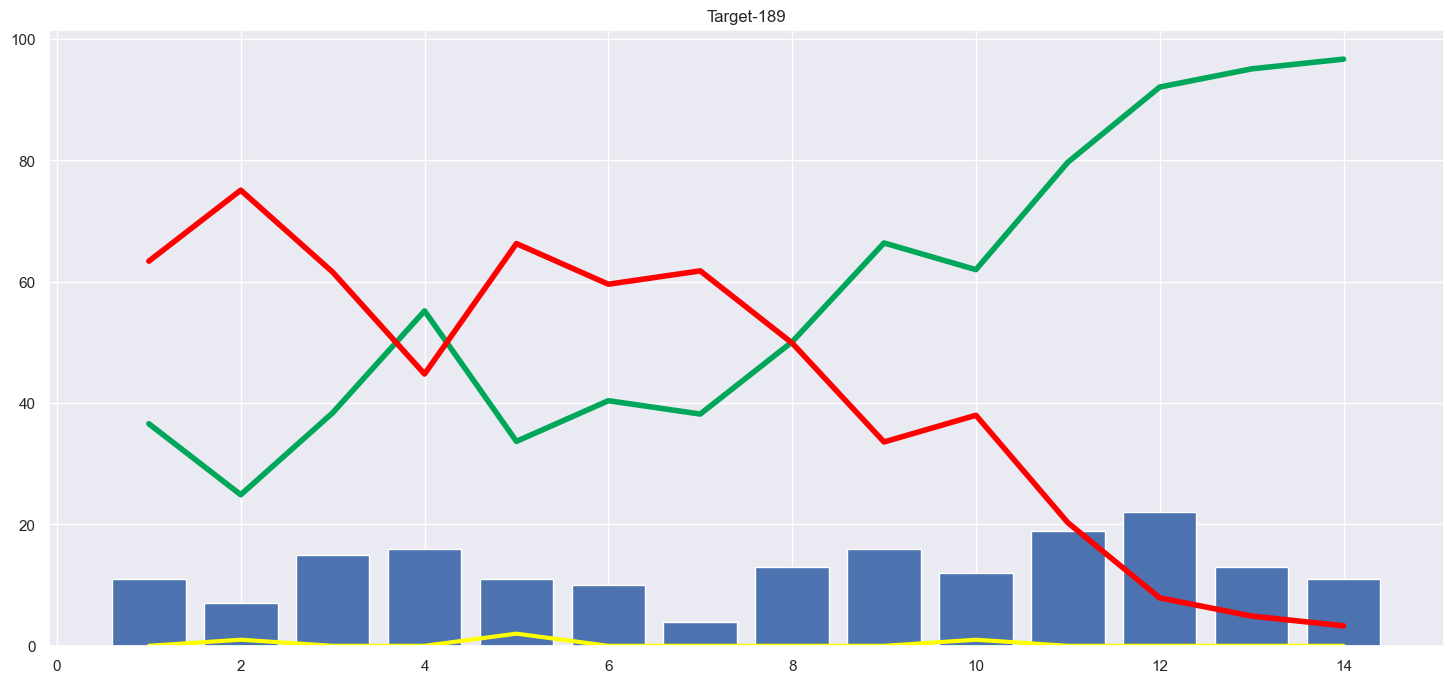

In [523]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [115]:
delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [116]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [117]:
x_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
26046,Chennai Super Kings,Rajasthan Royals,Chennai,30,31,9,147,7.955056,5.806452
13714,Rajasthan Royals,Sunrisers Hyderabad,Kimberley,69,23,2,166,6.061856,18.000000
45128,Chennai Super Kings,Kings XI Punjab,Cuttack,215,97,9,231,4.434783,13.298969
49853,Kolkata Knight Riders,Chennai Super Kings,Kolkata,141,100,10,165,7.500000,8.460000
6276,Mumbai Indians,Rajasthan Royals,Mumbai,102,112,10,103,1.500000,5.464286
...,...,...,...,...,...,...,...,...,...
65469,Chennai Super Kings,Royal Challengers Bangalore,Chennai,58,83,9,74,2.756757,4.192771
26206,Kings XI Punjab,Royal Challengers Bangalore,Bangalore,200,107,8,205,2.769231,11.214953
30532,Kings XI Punjab,Mumbai Indians,Mumbai,154,113,10,163,8.571429,8.176991
68327,Chennai Super Kings,Rajasthan Royals,Jaipur,135,83,6,158,3.891892,9.759036
